### Support Vector Machines Example 3.2
In order to fit an SVM using a radial kernel, we once again use the **svm.SVC()** function. However, now we use a different 
value of the parameter kernel. To fit an SVM with a radial kernel we use **kernel='rbf'**. We also use **gamma** to specify a value of $\gamma$ for the radial
kernel.

The data is randomly split into training and testing groups. We then fit
the training data using the **svm.SVC()** function with a radial kernel and $\gamma = 1$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from SVM_def import SVM_def

# SVM_def is a class containing definitions used throughout this Chapter
svm_def = SVM_def()

# Create nonlinear data
n = 100
np.random.seed(0) 
# x from normal distribution # y is 1 or 2
x = np.random.normal(scale = 1.0, size = (2*n, 2)) 
y = np.concatenate((np.ones(int(3/2*n)), 2*np.ones(int(1/2*n)))) 

x[:n, :] += 2
x[n:int(n*1.5), :] -= 2

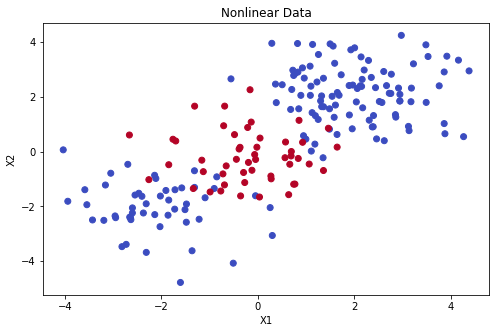

In [2]:
fig = plt.figure(figsize=[8, 5])

# Create scatter plot data
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(x[:,0], x[:,1], c=y, cmap=cm.coolwarm,  marker="o")

plt.xlabel("X1"), plt.ylabel("X2")
plt.title("Nonlinear Data")
plt.show()

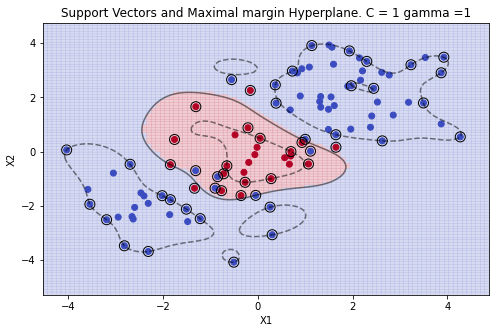

Number of Support Vectors:  52


In [3]:
""" First fit radial kernel """
# Create grid to evaluate model
xy, xx, yy = svm_def.create_grid(x, 100) 

# divide training data
np.random.seed(0) 
itrain = np.random.choice(200, 100, replace=False)

c, gamma = 1, 1
clf_g1 = svm.SVC(kernel='rbf', C=c, gamma=gamma)
clf_g1.fit(x[itrain], y[itrain])
Z_g1 = clf_g1.decision_function(xy).reshape(xx.shape)

# plot model
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
svm_def.svm_plot(ax, x[itrain, :], y[itrain], Z_g1, clf_g1, coloring=True)
title = ("Support Vectors and Maximal margin Hyperplane. C = " + str(c) 
         + " gamma =" + str(gamma))
plt.title(title)
plt.show()
print("Number of Support Vectors: ", len(clf_g1.support_))

The fit shown is a substantial improvement over the linear support vector classifier. The plot shows that the resulting SVM has a decidedly non-linear boundary.

We can see that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce the number of training errors.  However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

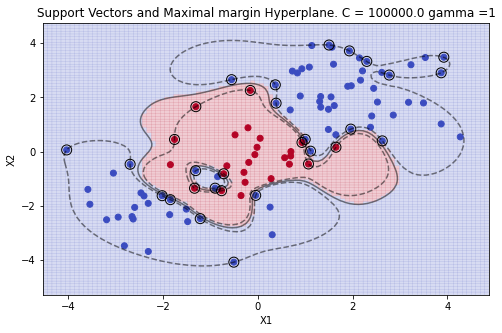

Number of Support Vectors:  31


In [4]:
""" Increased cost in fit radial kernel """
# New model
c, gamma = 1e5, 1
clf_g1_c1e5 = svm.SVC(kernel='rbf', C=c, gamma=gamma)
clf_g1_c1e5.fit(x[itrain], y[itrain])
Z_g1_c1e5 = clf_g1_c1e5.decision_function(xy).reshape(xx.shape)

# Create scatter plot data
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
svm_def.svm_plot(ax, x[itrain, :], y[itrain], Z_g1_c1e5, clf_g1_c1e5, 
                 coloring=True)
title = ("Support Vectors and Maximal margin Hyperplane. C = " + str(c) 
         + " gamma =" + str(gamma))
plt.title(title)
plt.show()
print("Number of Support Vectors: ", len(clf_g1_c1e5.support_))

We can perform cross-validation using **GridSearchCV** to select the best choice of $\gamma$ and cost for an SVM with a radial kernel:

In [5]:
""" Tune model """
# Set parameters to be tuned. Other options can be added
tune_parameters = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
                   'gamma':[0.1, 0.5, 1, 2, 3]}

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='rbf'), tune_parameters)
clf_tune.fit(x, y)

print("Best Parameters:\n", clf_tune.best_params_)
print("Mean scores:\n", clf_tune.cv_results_['mean_test_score'], 
      "\nStandard Deviation scores:\n", 
      np.round(clf_tune.cv_results_['std_test_score'], 3), 
      "\nRanking scores:\n", clf_tune.cv_results_['rank_test_score'])

Best Parameters:
 {'C': 10, 'gamma': 0.1}
Mean scores:
 [0.75  0.75  0.75  0.75  0.75  0.78  0.895 0.82  0.755 0.75  0.9   0.905
 0.885 0.89  0.885 0.895 0.88  0.89  0.895 0.875 0.91  0.89  0.89  0.88
 0.875 0.905 0.9   0.875 0.845 0.86  0.9   0.865 0.845 0.845 0.84 ] 
Standard Deviation scores:
 [0.    0.    0.    0.    0.    0.037 0.056 0.048 0.01  0.    0.077 0.056
 0.06  0.062 0.044 0.075 0.07  0.062 0.053 0.057 0.06  0.062 0.062 0.048
 0.042 0.056 0.061 0.042 0.051 0.051 0.057 0.066 0.06  0.046 0.037] 
Ranking scores:
 [30 30 30 30 30 28  7 27 29 30  4  2 14 10 15  8 16 10  8 18  1 10 10 16
 18  2  4 18 23 22  4 21 24 24 26]


Therefore, the best choice of parameters involves **cost=10** and **gamma=0.1**. We can view the test set predictions for this model by applying the **predict()** function to the data. Notice that to do this we subset the dataframe using **-train** as an index set.

In [6]:
""" Predict scores """
# Optimal parameter
clf_opt = svm.SVC(kernel='rbf', C=clf_tune.best_params_['C'], 
                  degree=clf_tune.best_params_['gamma'])
clf_opt.fit(x[itrain], y[itrain])
Z_opt = clf_opt.decision_function(xy).reshape(xx.shape)

# Test dataset
xtest = np.delete(x, itrain, axis=0)
ytest = np.delete(y, itrain, axis=0)

# Prediction
ypred_opt = clf_opt.predict(xtest)
tab_opt = svm_def.table_scores(ypred_opt, ytest)

print("Optimal C = ", clf_tune.best_params_['C'], " scores:\n", tab_opt)

Optimal C =  10  scores:
           Pred 1.0  Pred 2.0
True 1.0      71.0       4.0
True 2.0       6.0      19.0


 $10\%$ of test observations are misclassified by this SVM.

Number of Support Vectors:  24


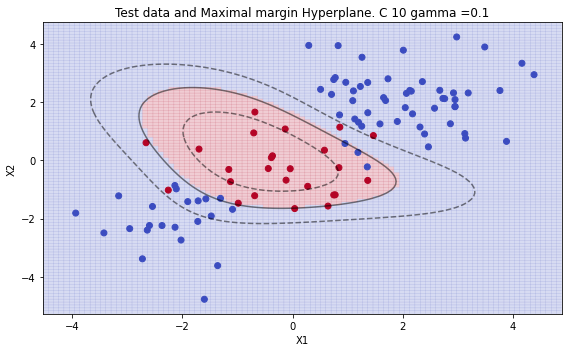

In [7]:
""" Plots """
fig = plt.figure(figsize=[8, 5])

# Create scatter plot data
ax = fig.add_subplot(1, 1, 1) 
svm_def.svm_plot(ax, xtest, ytest, Z_opt, clf_opt, coloring=True, 
                 suppvector=False)
title = ("Test data and Maximal margin Hyperplane. C " + 
         str(clf_tune.best_params_['C']) + " gamma =" + 
         str(clf_tune.best_params_['gamma']))
plt.title(title)

print("Number of Support Vectors: ", len(clf_opt.support_))
plt.tight_layout()
plt.show()